# Анализ деформации мяча при ударе с использованием пьезодатчика.

----------------------------------



##### Пьезодатчик - это устройство, которое преобразует механическое напряжение (в нашем случае из-за удара) в электрическое напряжение. Измеряя это электрическое напряжение, мы можем определить ускорение, скорость и перемещение мяча со временем в процессе удара.

## Я определю базовый класс, после чего буду вызывать каждый метод и пояснять его

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union


class BallDeformationAnalysis:
    def __init__(self, K: float, time_step: float, voltages: Union[list, tuple]) -> None:
        """
        Инициализация класса и его атрибутов
        """
        self.K = K  # калибровочная постоянная пьезодатчика
        self.time_step = time_step  # временной интервал между измерениями
        self.voltages = np.array(voltages)  # значения напряжений, измеренные пьезодатчиком
        self.x = 0.0001
        
    def acceleration(self) -> float:
        """
        Функция находит скорость ускорения мяча
        """
        return self.K * self.voltages * self.x

    def total_speed(self) -> float:
        """
        Функция находит влияние каждого ускорения на скорость (мяча)
        """
        a = self.acceleration()
        return np.cumsum(a) * self.time_step * self.x


    def displacement(self):
        """
        Функция находит насколько пройденное расстояние после всех толчков
        """
        v = self.total_speed()
        return np.cumsum(v) * self.time_step

    def get_displacement_at_time(self, time):
        """
        Возвращает положение мяча в конкретный момент времени.
        """
        index = int(time / self.time_step) + 1
        return self.displacement()[index]

    def plot_displacement_vs_time(self):
        """
        Рисуем график зависимости расстояния со временем
        """
        times = np.arange(0, len(self.voltages)*self.time_step, self.time_step)
        s = self.displacement()
        
        plt.plot(times, s)
        plt.xlabel('Time (s)')
        plt.ylabel('Distance (m)')
        plt.title('зависимость перемещения центра масс от времени')
        plt.grid(True)
        plt.show()

    def plot_total_speed_vs_time(self):
        times = np.arange(0, len(self.voltages)*self.time_step, self.time_step)
        v = self.total_speed()        
        plt.plot(times, v)
        plt.xlabel('Time (s)')
        plt.ylabel('Skorostь (m/s)')
        plt.title('Зависимость скорости от времени')
        plt.grid(True)
        plt.show()


-----------------

# Инициализация класса & переменных
##### Для начала давайте зададим переменные, которые будут использоваться в коде. Они вариативны так что при дальнейшем тестировании можно их изменить

In [22]:
K = 992384.7
time_step = 0.01
voltages = [0.001, 0.930, 1.008, 0.186, 0.124, 0.093, 0.062, 0.016, 0.008, 0.002, 0.001]

analysis = BallDeformationAnalysis(K, time_step, voltages)

---------------

## acceleration
##### Напряжение на датчике говорит нам, насколько сильно мяч ускоряется. Формула просто превращает напряжение в число, которое нам говорит о скорости ускорения мяча.

In [23]:
result = analysis.acceleration()
print(result)

[9.92384700e+02 9.22917771e+05 1.00032378e+06 1.84583554e+05
 1.23055703e+05 9.22917771e+04 6.15278514e+04 1.58781552e+04
 7.93907760e+03 1.98476940e+03 9.92384700e+02]


----------------


## total_speed
##### Простыми словами на примере, что делает эта функция: 
##### Если представить ускорение как толчок велосипеда, то скорость — это насколько быстро вы едете после всех толчков. Мы просто смотрим, как каждый толчок (или ускорение) менял скорость мяча со временем.

In [24]:
result = analysis.total_speed()
print(result)

[9.92384700e+00 9.23910156e+03 1.92423393e+04 2.10881749e+04
 2.23187319e+04 2.32416497e+04 2.38569282e+04 2.40157097e+04
 2.40951005e+04 2.41149482e+04 2.41248721e+04]


------------------

## displacement
##### Представьте, что вы едете на велосипеде. Эта функция говорит нам, насколько далеко вы уехали после всех толчков.

In [25]:
result = analysis.displacement()
print(result)

[9.92384700e-02 9.24902540e+01 2.84913647e+02 4.95795396e+02
 7.18982715e+02 9.51399212e+02 1.18996849e+03 1.43012559e+03
 1.67107660e+03 1.91222608e+03 2.15347480e+03]


-----------------


## get_displacement_at_time
##### Возвращает положение мяча в конкретный момент времени.
##### Пример получения положения мяча в момент времени 0.04 секунды

In [26]:

result = analysis.get_displacement_at_time(0.04)
print(result)

951.3992118900001


----------------

### Теперь строем просто 2 графика, зависимость рассотояния от времени + скорости от времени 

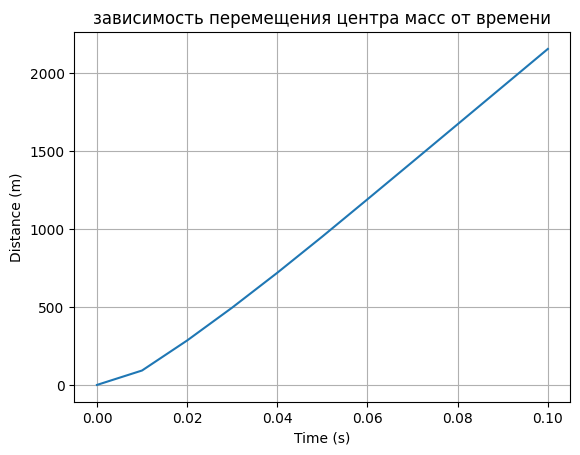

In [27]:
analysis.plot_displacement_vs_time()

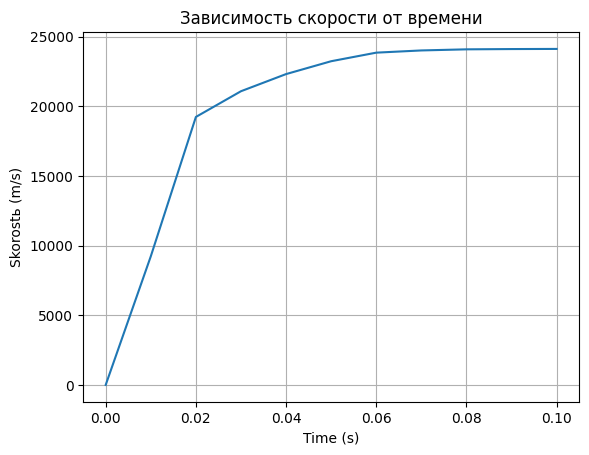

In [28]:
analysis.plot_total_speed_vs_time()